# \[Week3] 텍스트분석 기초

## 1. 텍스트 분석 기본 용어 정리
https://wikidocs.net/21694  
위의 링크와 구글링으로 정리  
용어 정리는 추후에 본인이 보기에 편한 형식으로 정리하면 됩니다.

1. 토큰화 (Tokenization)  
\[답변] 주어진 코퍼스 데이터에서 토큰이라고 불리는 단위로 나누는 작업.
 - 단어 토큰화 : 토큰의 기준을 단어로 하는 경우.
 토큰화 작업은 단순히 코퍼스에서 구두점(온점, 컴마, 물음표, 등 기호)을 제외하고 공백 기준으로 잘라내는 작업이라고 간주하면 안됨. (∵ \$, \/ 등 의미를 가지는 특수문자, 줄임말, 단어 내 띄어쓰기 있는 경우)
 - 문장 토큰화 : 토큰의 기준이 문장인 경우.
 온점은 문장의 구분을 위한 명확한 구분자가 아님. → 이진 분류기 사용-온점이 단어의 일부분일 경우와 문장의 구분자일 경우 분류

2. 불용어 (Stopword)  
\[답변] 큰의미가 없는 단어 토큰. 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어. 

3. 정규표현식 (Regular Expression) 문법  

1) 정규 표현식에 해당하는 스트링 2개 이상  
(1) a+  
\[답변] a가 최소 한개 이상 존재
<br>
(2) a{3}b{2,}  
\[답변] a가 3번 반복, b가 2번 이상 반복
<br>
(3) .+b$  
\[답변] 앞에 한개 이상의 임의의 문자가 존재하고 b로 끝나는 문자열
<br>
(4) ^ab*
<br>
\[답변] a로 시작하고 b가 0개 이상인 문자열
<br>
(5) \[a-z]+\[^a|z]  
\[답변] 한개 이상의 알파벳 소문자가 존재하고, a또는z가 아닌 문자로 끝나는 문자열 

2) 정규 표현식 문자 규칙 의미  
(1) \\\ \[답변] 역슬래쉬 문자 자체
<br>
(2) \d \[답변] 모든 숫자 [0-9]
<br>
(3) \D \[답변] 숫자를 제외한 모든 문자 [^0-9]
<br>
(4) \s \[답변] 공백
<br>
(5) \S \[답변] 공백을 제외한 문자
<br>
(6) \w \[답변] 문자 또는 숫자 [a-zA-Z0-9]
<br>
(7) \W \[답변] 문자 또는 숫자가 아닌 문자 [^a-zA-Z0-9]

3) 정규표현식 모듈 함수 사용

(1) 출력 결과 : \['010', '1234', '1234', '30']

In [6]:
import re
text = """이름 : 눈송이
전화번호 : 010-1234-5678
나이 : 25
성별 : 여""" 
## 코드 작성
re.findall("\d+",text)

['010', '1234', '5678', '25']

(2) 출력 결과 : \['1234', '5678']

In [11]:
import re
text = """이름 : 눈송이
전화번호 : 010-1234-5678
나이 : 25
성별 : 여"""  
# 코드 작성
re.findall("\d{4}",text)

['1234', '5678']

(3) 출력 결과 : \['John', 'James', 'Noonsong'] 

In [12]:
import re
text = """100 John    PROF
101 James   STUD
102 Noonsong   STUD""" 
# 코드 작성
re.findall("[A-Z][a-z]+",text)

['John', 'James', 'Noonsong']

4. 정수 인코딩(Integer Encoding)  

1) 문장 분리 및 토큰화

In [62]:
# 이 셀은 실행만 시키면 됩니다.
text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."
# 문장 분리
sentences = text.replace("!", ".").split(". ")
# 토큰화
tokenized = [sentence.lower().split() for sentence in sentences]

2) 각 단어에 대한 빈도수 딕셔너리 저장  
\[출력] \[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain.', 1)]

In [63]:
# 각 단어에 대한 빈도수 딕셔너리로 저장 
# *stopword는 제거
from nltk.corpus import stopwords
vocab = {}
stop_words = set(stopwords.words('english'))
sentences = []      # stopword 제거된 토큰화된 문장 리스트 저장
# 여기부터 코드 작성

for i in tokenized :
    result = []
    for word in i :
        if word not in stop_words:
            result.append(word)
            if word not in vocab:
                vocab[word] = 0 
            vocab[word] += 1
    sentences.append(result)
# 빈도수 높은 순으로 정렬
# 여기부터 코드 작성
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse=True)
print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain.', 1)]


3) 빈도순으로 정렬된 단어에 정수 인덱스 부여  
\[출력] \[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]

In [67]:
word_to_index = {}
i = 1
# 여기부터 코드 작성
for (word, frequency) in vocab_sorted :
    word_to_index[word] = i
    i=i+1

# dictionary에 없는 단어
word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain.': 13, 'OOV': 14}


4) word_to_index를 사용하여 sentences의 모든 단어들을 맵핑되는 정수로 인코딩  
\[출력] \[\[1, 5], \[1, 8, 5], \[1, 3, 5], \[9, 2], \[2, 4, 3, 2], \[3, 2], \[1, 4, 6], \[1, 4, 6], \[1, 4, 2], \[7, 7, 3, 2, 10, 1, 11], \[1, 12, 3, 13]]

In [68]:
encoded = []
# 여기부터 코드 작성
for s in sentences:
    temp = []
    for w in s:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['OOV'])
    encoded.append(temp)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


5. 패딩(Padding)  
0으로 패딩해보기

1) 가장 긴 문장 길이 찾기

In [69]:
max_len = max(len(item) for item in encoded)# 가장 긴 문장 길이 찾기
print(max_len)

7


2) 가장 긴 문장 길이에 맞춰 0으로 채워넣기  
\[\[ 1  5  0  0  0  0  0]  
 \[ 1  8  5  0  0  0  0]  
 \[ 1  3  5  0  0  0  0]  
 \[ 9  2  0  0  0  0  0]  
 \[ 2  4  3  2  0  0  0]  
 \[ 3  2  0  0  0  0  0]  
 \[ 1  4  6  0  0  0  0]  
 \[ 1  4  6  0  0  0  0]  
 \[ 1  4  2  0  0  0  0]  
 \[ 7  7  3  2 10  1 11]  
 \[ 1 12  3 13  0  0  0]]

In [70]:
import numpy as np
for sentence in encoded:
    # 아래 pass 지우고 코드 작성
    while len(sentence) < max_len :
        sentence.append(0)

encoded = np.array(encoded)        # 지금은 보기 좋게 하기 위함임..
print(encoded)

[[ 1  5  0  0  0  0  0]
 [ 1  8  5  0  0  0  0]
 [ 1  3  5  0  0  0  0]
 [ 9  2  0  0  0  0  0]
 [ 2  4  3  2  0  0  0]
 [ 3  2  0  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  2  0  0  0  0]
 [ 7  7  3  2 10  1 11]
 [ 1 12  3 13  0  0  0]]


6. 원-핫 인코딩(One-Hot Encoding)  
\[출력] \[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [71]:
def one_hot_encoding(word, word_to_index):
    # 아래 pass 지우고 여기부터 코드 작성
    one_hot_vector = [0]*(len(word_to_index))
    index=word_to_index[word]
    one_hot_vector[index]=1
    return one_hot_vector

In [72]:
# 위의 함수와 정수 인코딩 실행 후 실행할 것.
one_hot_encoding("huge", word_to_index)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

7. Bag of Words(BoW)  
\[답변] 단어들의 출현 빈도에만 집중하는 텍스트 데이터의 수치화 표현 방법.
    1. 각 단어에 고유한 정수 인덱스 부여
    1. 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터

## 2. 텍스트 분석 전처리 경험해보기

1. 본인이 좋아하는 노래 가사, 시 등 text에 저장

In [79]:
text = "I won't be silenced You can't keep me quiet Won't tremble when you try it All I know is I won't go speechless"# 좋아하는 문장들


2. 토큰화

In [80]:
# Tokenizer 사용해보셔도 됩니다.
# Tokenizer 사용 시 시간이 좀 걸리기 때문에 그냥 띄어쓰기 기준으로 나눴습니다,
text = text.split()

3. 불용어 제거

In [81]:
stopwords = ['i', 'me', 'you', 'is']# 본인이 생각하는 불용어 리스트 만들기

4. 빈도수 리스트 만들기

In [82]:
word_dict = {}
# 코드 작성
for word in text :
    word=word.lower()
    if word not in stopwords :
        if word not in word_dict :
            word_dict[word]=0
        word_dict[word] += 1
        
        
print(word_dict)

{"won't": 3, 'be': 1, 'silenced': 1, "can't": 1, 'keep': 1, 'quiet': 1, 'tremble': 1, 'when': 1, 'try': 1, 'it': 1, 'all': 1, 'know': 1, 'go': 1, 'speechless': 1}


5. 워드 클라우드 이미지 생성

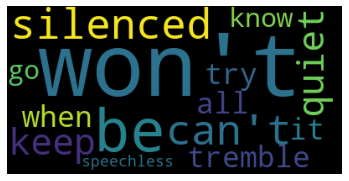

In [88]:
from wordcloud import WordCloud
# word_dict 를 이용해 wordcloud 만들기
# 코드 작성
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(word_dict)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
